In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
from keras.datasets import mnist


In [9]:
(X_train , y_train), (X_test, y_test) = mnist.load_data()

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (60000,)


In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
from keras.utils import np_utils

In [15]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [16]:
print(Y_train.shape, Y_test.shape)

(60000, 10) (10000, 10)


# Image PLotting

<function matplotlib.pyplot.show(*args, **kw)>

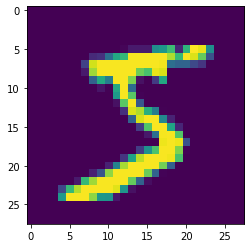

In [17]:
plt.imshow(X_train[0])
plt.show

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train  = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

REduec the Dataset

In [22]:
X_train = X_train[:3600]
X_test = X_test[:900]
Y_train = Y_train[:3600]
Y_test = Y_test[:900]

In [23]:
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(3600, 28, 28, 1) (3600, 10)
(900, 28, 28, 1) (900, 10)


# Building CNN Model

In [24]:
from  keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, MaxPool2D, Conv2D, Dropout

In [26]:
model = Sequential()

model.add(Conv2D(32,(3,3),
                input_shape = (28,28,1)))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))

model.add(Flatten())



model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 16)       

# Compilation 

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train,
         validation_data=(X_test, Y_test),
         batch_size=16,
         epochs=10,
         verbose=2)

Train on 3600 samples, validate on 900 samples
Epoch 1/10
 - 8s - loss: 1.0192 - accuracy: 0.7547 - val_loss: 0.3802 - val_accuracy: 0.8778
Epoch 2/10
 - 7s - loss: 0.1742 - accuracy: 0.9483 - val_loss: 0.2166 - val_accuracy: 0.9267
Epoch 3/10
 - 7s - loss: 0.0965 - accuracy: 0.9714 - val_loss: 0.1892 - val_accuracy: 0.9333
Epoch 4/10
 - 7s - loss: 0.0760 - accuracy: 0.9761 - val_loss: 0.2492 - val_accuracy: 0.9322
Epoch 5/10
 - 7s - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.2143 - val_accuracy: 0.9378
Epoch 6/10
 - 7s - loss: 0.0273 - accuracy: 0.9883 - val_loss: 0.2788 - val_accuracy: 0.9444
Epoch 7/10
 - 7s - loss: 0.0546 - accuracy: 0.9808 - val_loss: 0.2664 - val_accuracy: 0.9278
Epoch 8/10
 - 7s - loss: 0.0494 - accuracy: 0.9861 - val_loss: 0.2579 - val_accuracy: 0.9433
Epoch 9/10
 - 7s - loss: 0.0351 - accuracy: 0.9858 - val_loss: 0.2256 - val_accuracy: 0.9422
Epoch 10/10
 - 7s - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.2231 - val_accuracy: 0.9533
